In [1]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import torch.optim as optim
import pandas as pd
import numpy as np
import torch

url = 'https://raw.githubusercontent.com/hburnt/Intro-to-ML-datasets/main/Housing.csv'
df = pd.DataFrame(pd.read_csv(url))

var_list = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

def binary_map(input):
  return input.map({'no' : 0, 'yes' : 1})

df[var_list] = df[var_list].apply(binary_map)
df = df.drop('furnishingstatus', axis=1)
outputs = df.pop('price')

features = df.columns.tolist()


inputs = df[features].values
                
t_un = torch.tensor(StandardScaler().fit_transform(inputs), dtype=torch.float32)
t_u = torch.tensor(inputs, dtype=torch.float32)
t_c = torch.tensor(outputs, dtype=torch.float32)
                
sample_size = t_u.shape[0]
value_size = int(0.2 * sample_size)

shuffled_indices = torch.randperm(sample_size)

train_indices = shuffled_indices[:-value_size]
val_indices = shuffled_indices[-value_size:]

train_t_u = t_u[train_indices]
train_t_c = t_c[train_indices]

val_t_u = t_u[val_indices]
val_t_c = t_c[val_indices]

train_t_un = t_un[train_indices]
val_t_un = t_un[val_indices]

In [2]:
def linear_model(t_u, w11, w10, w9, w8, w7, w6, w5, w4, w3, w2, w1, b):
    return torch.matmul(t_u, parameters[:-1]) + parameters[-1]

In [3]:
def loss_fn(t_p, t_c):
    square_error = (t_p - t_c)**2
    return square_error.mean()

In [4]:
def linear_training_loop(epochs, optimizer, parameters, train_t_u, val_t_u, train_t_c, val_t_c):
    training_loss = []
    validation_loss = []
    
    for epoch in range(1, epochs+1):
        train_t_p = linear_model(train_t_u, *parameters)
        train_loss = loss_fn(train_t_p, train_t_c)
        
        val_t_p = linear_model(val_t_u, *parameters)
        val_loss = loss_fn(val_t_p, val_t_c)
        
        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()
        
        training_loss.append(train_loss)
        validation_loss.append(val_loss)
        
        if epoch % 500 == 0:
            print(f'Epochs: {epoch}, \tTraining loss {train_loss:}, \tValidation loss: {val_loss:}')
    print('')     
    return parameters, training_loss, validation_loss

In [5]:
#SGD Optimizer with LR: 0.1
parameters = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
epochs = 5000
learning_rate = 0.1
optimizer = optim.SGD([parameters], lr = learning_rate)

model, training_loss, validation_loss = linear_training_loop(epochs, optimizer, parameters, train_t_un, val_t_un, train_t_c, val_t_c)
SGD_training_loss1 = np.array([item.detach().item() for item in training_loss])
SGD_validation_loss1 = np.array([item.detach().item() for item in validation_loss])

Epochs: 500, 	Training loss 1212683255808.0, 	Validation loss: 879989751808.0
Epochs: 1000, 	Training loss 1212683255808.0, 	Validation loss: 879989751808.0
Epochs: 1500, 	Training loss 1212683255808.0, 	Validation loss: 879989751808.0
Epochs: 2000, 	Training loss 1212683255808.0, 	Validation loss: 879989751808.0
Epochs: 2500, 	Training loss 1212683255808.0, 	Validation loss: 879989751808.0
Epochs: 3000, 	Training loss 1212683255808.0, 	Validation loss: 879989751808.0
Epochs: 3500, 	Training loss 1212683255808.0, 	Validation loss: 879989751808.0
Epochs: 4000, 	Training loss 1212683255808.0, 	Validation loss: 879989751808.0
Epochs: 4500, 	Training loss 1212683255808.0, 	Validation loss: 879989751808.0
Epochs: 5000, 	Training loss 1212683255808.0, 	Validation loss: 879989751808.0



In [6]:
#SGD Optimizer with LR: 0.01
parameters = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
epochs = 5000
learning_rate = 0.01
optimizer = optim.SGD([parameters], lr = learning_rate)

model, training_loss, validation_loss = linear_training_loop(epochs, optimizer, parameters, train_t_un, val_t_un, train_t_c, val_t_c)
SGD_training_loss2 = np.array([item.detach().item() for item in training_loss])
SGD_validation_loss2 = np.array([item.detach().item() for item in validation_loss])

Epochs: 500, 	Training loss 1212695707648.0, 	Validation loss: 878748041216.0
Epochs: 1000, 	Training loss 1212683386880.0, 	Validation loss: 879966617600.0
Epochs: 1500, 	Training loss 1212683386880.0, 	Validation loss: 879986868224.0
Epochs: 2000, 	Training loss 1212683386880.0, 	Validation loss: 879986868224.0
Epochs: 2500, 	Training loss 1212683386880.0, 	Validation loss: 879986868224.0
Epochs: 3000, 	Training loss 1212683386880.0, 	Validation loss: 879986868224.0
Epochs: 3500, 	Training loss 1212683386880.0, 	Validation loss: 879986868224.0
Epochs: 4000, 	Training loss 1212683386880.0, 	Validation loss: 879986868224.0
Epochs: 4500, 	Training loss 1212683386880.0, 	Validation loss: 879986868224.0
Epochs: 5000, 	Training loss 1212683386880.0, 	Validation loss: 879986868224.0



In [7]:
#SGD Optimizer with LR: 0.001
parameters = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
epochs = 5000
learning_rate = 0.001
optimizer = optim.SGD([parameters], lr = learning_rate)

model, training_loss, validation_loss = linear_training_loop(epochs, optimizer, parameters, train_t_un, val_t_un, train_t_c, val_t_c)
SGD_training_loss3 = np.array([item.detach().item() for item in training_loss])
SGD_validation_loss3 = np.array([item.detach().item() for item in validation_loss])

Epochs: 500, 	Training loss 4336464691200.0, 	Validation loss: 3766656958464.0
Epochs: 1000, 	Training loss 1646693318656.0, 	Validation loss: 1224774647808.0
Epochs: 1500, 	Training loss 1276554379264.0, 	Validation loss: 894526291968.0
Epochs: 2000, 	Training loss 1223084081152.0, 	Validation loss: 863749931008.0
Epochs: 2500, 	Training loss 1214734401536.0, 	Validation loss: 867488301056.0
Epochs: 3000, 	Training loss 1213214883840.0, 	Validation loss: 872238481408.0
Epochs: 3500, 	Training loss 1212860858368.0, 	Validation loss: 875229347840.0
Epochs: 4000, 	Training loss 1212752461824.0, 	Validation loss: 876999409664.0
Epochs: 4500, 	Training loss 1212712353792.0, 	Validation loss: 878067253248.0
Epochs: 5000, 	Training loss 1212695969792.0, 	Validation loss: 878732705792.0



In [8]:
#SGD Optimizer with LR: 0.0001
parameters = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
epochs = 5000
learning_rate = 0.0001
optimizer = optim.SGD([parameters], lr = learning_rate)

model, training_loss, validation_loss = linear_training_loop(epochs, optimizer, parameters, train_t_un, val_t_un, train_t_c, val_t_c)
SGD_training_loss4 = np.array([item.detach().item() for item in training_loss])
SGD_validation_loss4 = np.array([item.detach().item() for item in validation_loss])

Epochs: 500, 	Training loss 21692327919616.0, 	Validation loss: 18880395214848.0
Epochs: 1000, 	Training loss 17599811289088.0, 	Validation loss: 15464713420800.0
Epochs: 1500, 	Training loss 14395895709696.0, 	Validation loss: 12740292771840.0
Epochs: 2000, 	Training loss 11863899242496.0, 	Validation loss: 10549066727424.0
Epochs: 2500, 	Training loss 9847444602880.0, 	Validation loss: 8775570817024.0
Epochs: 3000, 	Training loss 8231541276672.0, 	Validation loss: 7333480497152.0
Epochs: 3500, 	Training loss 6930202886144.0, 	Validation loss: 6156977176576.0
Epochs: 4000, 	Training loss 5878059630592.0, 	Validation loss: 5194914463744.0
Epochs: 4500, 	Training loss 5024743161856.0, 	Validation loss: 4406989291520.0
Epochs: 5000, 	Training loss 4330980376576.0, 	Validation loss: 3761064902656.0



In [9]:
# Adam Optimizer with LR: 0.1
parameters = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
epochs = 5000
learning_rate = 0.1
optimizer = optim.Adam([parameters], lr = learning_rate)

model, training_loss, validation_loss = linear_training_loop(epochs, optimizer, parameters, train_t_u, val_t_u, train_t_c, val_t_c)
Adam_training_loss1 = np.array([item.detach().item() for item in training_loss])
Adam_validation_loss1 = np.array([item.detach().item() for item in validation_loss])

Epochs: 500, 	Training loss 24273840242688.0, 	Validation loss: 20915737853952.0
Epochs: 1000, 	Training loss 21850784530432.0, 	Validation loss: 18857437691904.0
Epochs: 1500, 	Training loss 19629026050048.0, 	Validation loss: 16965965971456.0
Epochs: 2000, 	Training loss 17592341233664.0, 	Validation loss: 15227804450816.0
Epochs: 2500, 	Training loss 15727575695360.0, 	Validation loss: 13631997607936.0
Epochs: 3000, 	Training loss 14024118894592.0, 	Validation loss: 12169721675776.0
Epochs: 3500, 	Training loss 12473442762752.0, 	Validation loss: 10833905057792.0
Epochs: 4000, 	Training loss 11068587900928.0, 	Validation loss: 9618799460352.0
Epochs: 4500, 	Training loss 9803724226560.0, 	Validation loss: 8519628095488.0
Epochs: 5000, 	Training loss 8673765621760.0, 	Validation loss: 7532261146624.0



In [10]:
# Adam Optimizer with LR: 0.01
parameters = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
epochs = 5000
learning_rate = 0.01
optimizer = optim.Adam([parameters], lr = learning_rate)

model, training_loss, validation_loss = linear_training_loop(epochs, optimizer, parameters, train_t_u, val_t_u, train_t_c, val_t_c)
Adam_training_loss2 = np.array([item.detach().item() for item in training_loss])
Adam_validation_loss2 = np.array([item.detach().item() for item in validation_loss])

Epochs: 500, 	Training loss 26638131658752.0, 	Validation loss: 22920308981760.0
Epochs: 1000, 	Training loss 26365732585472.0, 	Validation loss: 22689523695616.0
Epochs: 1500, 	Training loss 26095491481600.0, 	Validation loss: 22460529377280.0
Epochs: 2000, 	Training loss 25827293003776.0, 	Validation loss: 22233221169152.0
Epochs: 2500, 	Training loss 25561030197248.0, 	Validation loss: 22007513088000.0
Epochs: 3000, 	Training loss 25296621273088.0, 	Validation loss: 21783335927808.0
Epochs: 3500, 	Training loss 25033999122432.0, 	Validation loss: 21560622579712.0
Epochs: 4000, 	Training loss 24773128093696.0, 	Validation loss: 21339352072192.0
Epochs: 4500, 	Training loss 24513938980864.0, 	Validation loss: 21119469879296.0
Epochs: 5000, 	Training loss 24256419201024.0, 	Validation loss: 20900959223808.0



In [11]:
# Adam Optimizer with LR: 0.001
parameters = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
epochs = 5000
learning_rate = 0.001
optimizer = optim.Adam([parameters], lr = learning_rate)

model, training_loss, validation_loss = linear_training_loop(epochs, optimizer, parameters, train_t_u, val_t_u, train_t_c, val_t_c)
Adam_training_loss3 = np.array([item.detach().item() for item in training_loss])
Adam_validation_loss3 = np.array([item.detach().item() for item in validation_loss])

Epochs: 500, 	Training loss 26884758831104.0, 	Validation loss: 23129216778240.0
Epochs: 1000, 	Training loss 26857208545280.0, 	Validation loss: 23105881767936.0
Epochs: 1500, 	Training loss 26829681328128.0, 	Validation loss: 23082563534848.0
Epochs: 2000, 	Training loss 26802172985344.0, 	Validation loss: 23059259981824.0
Epochs: 2500, 	Training loss 26774679322624.0, 	Validation loss: 23035977400320.0
Epochs: 3000, 	Training loss 26747210825728.0, 	Validation loss: 23012711596032.0
Epochs: 3500, 	Training loss 26719759106048.0, 	Validation loss: 22989452083200.0
Epochs: 4000, 	Training loss 26692326260736.0, 	Validation loss: 22966215639040.0
Epochs: 4500, 	Training loss 26664903901184.0, 	Validation loss: 22942985486336.0
Epochs: 5000, 	Training loss 26637502513152.0, 	Validation loss: 22919772110848.0



In [12]:
# Adam Optimizer with LR: 0.0001
parameters = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
epochs = 5000
learning_rate = 0.0001
optimizer = optim.Adam([parameters], lr = learning_rate)

model, training_loss, validation_loss = linear_training_loop(epochs, optimizer, parameters, train_t_u, val_t_u, train_t_c, val_t_c)
Adam_training_loss4 = np.array([item.detach().item() for item in training_loss])
Adam_validation_loss4 = np.array([item.detach().item() for item in validation_loss])

Epochs: 500, 	Training loss 26909524099072.0, 	Validation loss: 23150194589696.0
Epochs: 1000, 	Training loss 26906768441344.0, 	Validation loss: 23147856265216.0
Epochs: 1500, 	Training loss 26904008589312.0, 	Validation loss: 23145520037888.0
Epochs: 2000, 	Training loss 26901248737280.0, 	Validation loss: 23143185907712.0
Epochs: 2500, 	Training loss 26898490982400.0, 	Validation loss: 23140847583232.0
Epochs: 3000, 	Training loss 26895733227520.0, 	Validation loss: 23138511355904.0
Epochs: 3500, 	Training loss 26892975472640.0, 	Validation loss: 23136175128576.0
Epochs: 4000, 	Training loss 26890215620608.0, 	Validation loss: 23133838901248.0
Epochs: 4500, 	Training loss 26887457865728.0, 	Validation loss: 23131504771072.0
Epochs: 5000, 	Training loss 26884700110848.0, 	Validation loss: 23129166446592.0



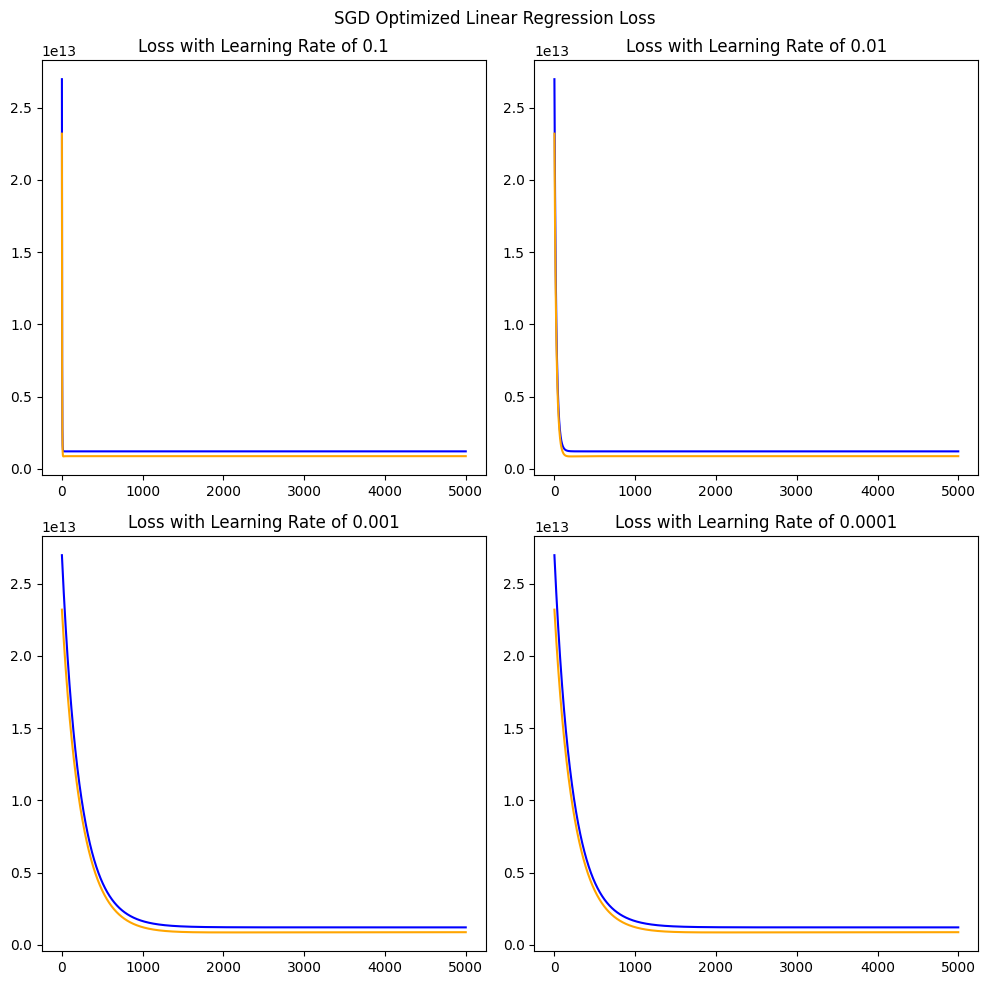

In [13]:
plt.figure(figsize=(10, 10))
plt.suptitle('SGD Optimized Linear Regression Loss')

plt.subplot(2,2,1)
plt.plot(SGD_training_loss1, color='blue')
plt.plot(SGD_validation_loss1, color='orange')
plt.title('Loss with Learning Rate of 0.1')

plt.subplot(2,2,2)
plt.plot(SGD_training_loss2, color='blue')
plt.plot(SGD_validation_loss2, color='orange')
plt.title('Loss with Learning Rate of 0.01')

plt.subplot(2,2,3)
plt.plot(SGD_training_loss3, color='blue')
plt.plot(SGD_validation_loss3, color='orange')
plt.title('Loss with Learning Rate of 0.001')

plt.subplot(2,2,4)
plt.plot(SGD_training_loss3, color='blue')
plt.plot(SGD_validation_loss3, color='orange')
plt.title('Loss with Learning Rate of 0.0001')

plt.tight_layout()
plt.show()

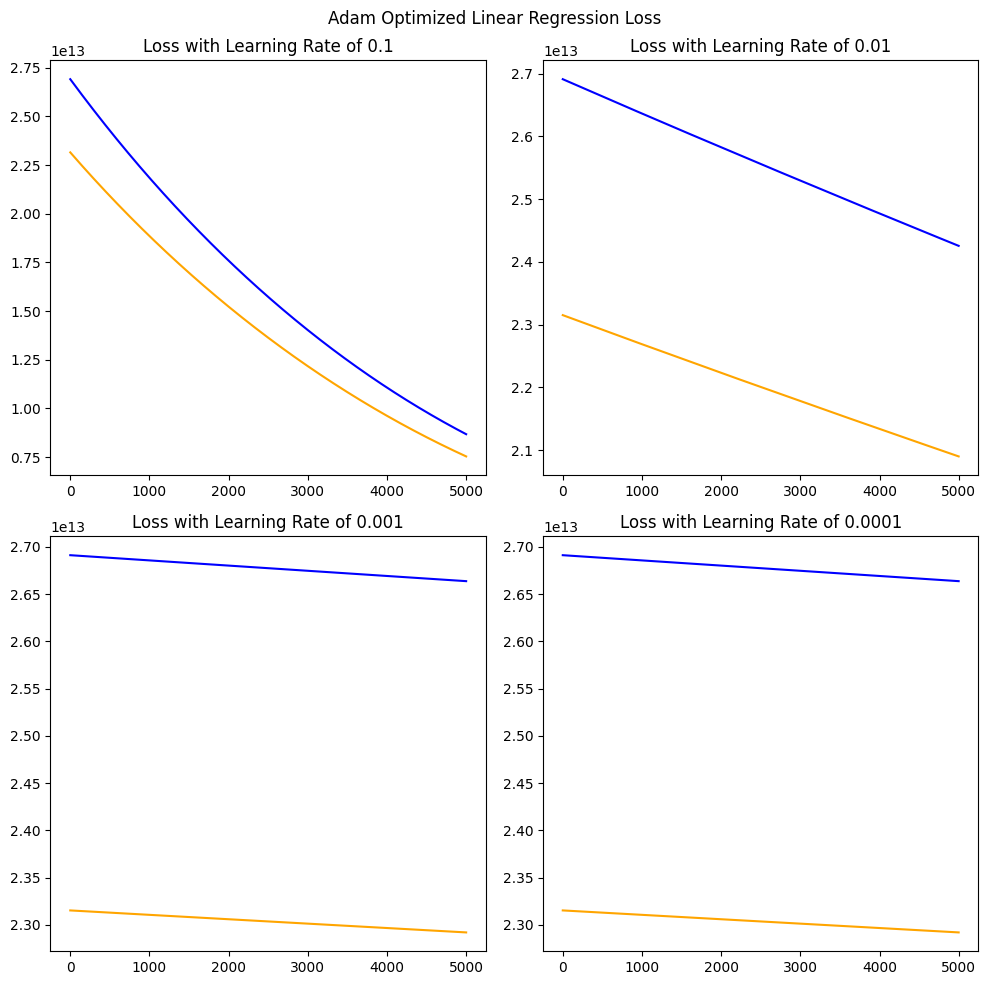

In [14]:
plt.figure(figsize=(10, 10))
plt.suptitle('Adam Optimized Linear Regression Loss')

plt.subplot(2,2,1)
plt.plot(Adam_training_loss1, color='blue')
plt.plot(Adam_validation_loss1, color='orange')
plt.title('Loss with Learning Rate of 0.1')

plt.subplot(2,2,2)
plt.plot(Adam_training_loss2, color='blue')
plt.plot(Adam_validation_loss2, color='orange')
plt.title('Loss with Learning Rate of 0.01')

plt.subplot(2,2,3)
plt.plot(Adam_training_loss3, color='blue')
plt.plot(Adam_validation_loss3, color='orange')
plt.title('Loss with Learning Rate of 0.001')

plt.subplot(2,2,4)
plt.plot(Adam_training_loss3, color='blue')
plt.plot(Adam_validation_loss3, color='orange')
plt.title('Loss with Learning Rate of 0.0001')

plt.tight_layout()
plt.show()